In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Ts = 1/12
c = 20
eta = 0.9

case_template = 'Strategic/LDES/10GW_ED1_Strategic_true_FORB_true_ratio1.0_Seg1_LDESRatio_{}-0.0-{}-0.0'


ratios = [round(i * 0.1, 1) for i in range(11)]
LDES24 = [2.23, 2.007, 1.784, 1.561, 1.338, 1.115, 0.892, 0.669, 0.446, 0.223, 0.0]
# LDES100= [1.64, 1.23, 0.82, 0.41, 0.0]

### Price Stats

In [3]:
# Initialize lists to hold DataFrames
mean_prices_dfs = []
std_prices_dfs = []

In [4]:
# Loop over ratios from 0.0 to 1.0 (assuming increment by 0.1)
for (ratio,LDES) in zip(ratios,LDES24):
    case = case_template.format(ratio, LDES)
    try:
        # Try to read the CSV file for the current case
        price = pd.read_csv('output/'+case+'/EDprice.csv', header=None)
    except FileNotFoundError:
        print(f"File for case {case} not found.")
        continue

    # Calculate stats and transpose
    pricestats = pd.concat([price.mean()*12, (price*12).std()], axis=1).T

    # Now, instead of appending Series objects, you create DataFrame slices for each and append them
    mean_prices_dfs.append(pricestats.iloc[[0]])
    std_prices_dfs.append(pricestats.iloc[[1]])

In [5]:
# Convert lists of series to DataFrames
mean_prices_df = pd.concat(mean_prices_dfs).reset_index(drop=True)
std_prices_df = pd.concat(std_prices_dfs).reset_index(drop=True)
mean_prices_df.index = ratios
std_prices_df.index = ratios

In [6]:
mean_prices_df

,0,1,2,3,4,5
0.0,52.554763,65.558648,48.592146,6.850228,49.457934,51.085873
0.1,52.564737,65.518955,48.544259,6.830091,49.479736,51.029477
0.2,52.574752,65.615813,48.575771,6.566180,49.469069,51.061969
0.3,52.476712,65.654363,48.621370,5.699731,49.338501,51.118611
0.4,52.506190,65.678463,48.495662,6.297622,49.369260,51.043161
0.5,52.529398,65.773229,48.591618,5.783667,49.375427,51.151489
0.6,52.571142,65.861783,48.466928,6.097013,49.406023,51.067169
0.7,52.484190,66.094106,48.531051,5.631385,49.243037,51.151666
0.8,52.192314,65.553529,48.495412,3.724649,49.010388,51.127844
0.9,52.373491,66.743858,48.046466,4.561159,48.951239,50.871430


In [7]:
std_prices_df

,0,1,2,3,4,5
0.0,21.037154,28.032496,21.966441,53.142585,21.091550,21.899883
0.1,21.047435,27.963681,21.985821,53.136646,21.074335,21.966122
0.2,21.088610,27.877466,22.022528,53.202599,21.139894,21.988872
0.3,21.082433,27.940485,22.093867,53.171818,21.130807,22.058821
0.4,21.046808,27.763504,22.040851,53.173956,21.114266,22.001238
0.5,21.105881,27.955589,22.026554,53.262029,21.166235,22.003427
0.6,21.185691,28.283227,22.142164,53.316472,21.234649,22.138022
0.7,21.456788,31.734213,22.250916,53.374790,21.282294,22.314702
0.8,21.673912,29.592698,22.824325,53.340730,21.558238,22.855913
0.9,22.624817,42.815838,23.141541,53.440855,21.584509,23.275836


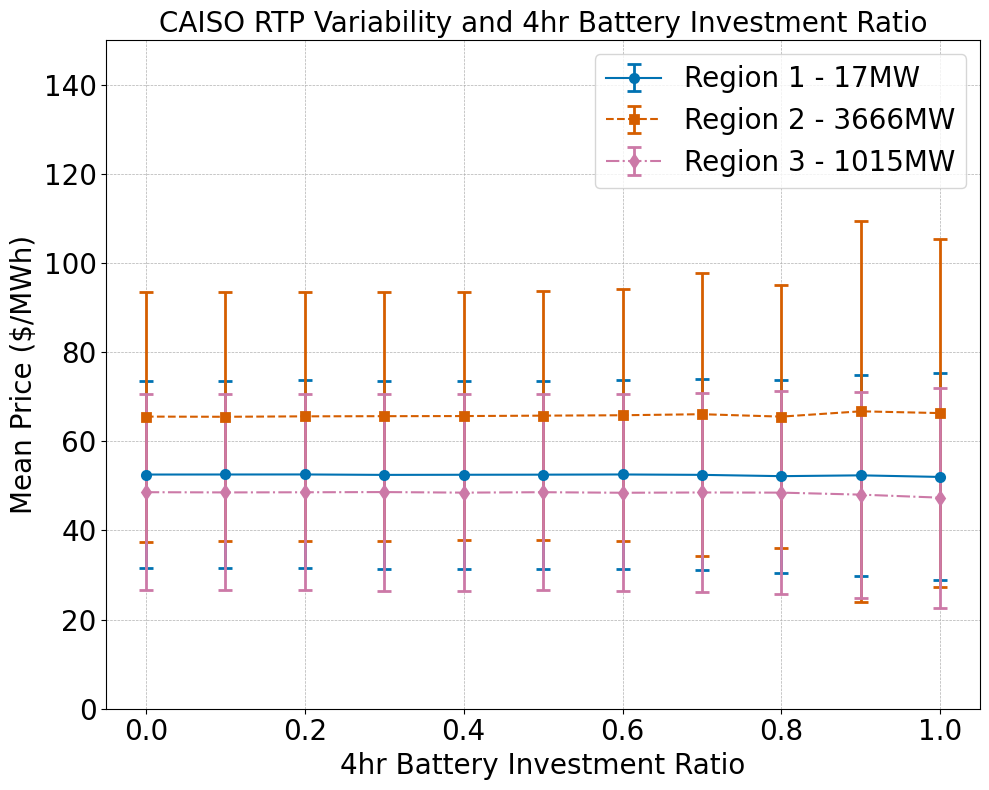

In [8]:
# Assuming mean_prices_df and std_prices_df are already defined
# Selecting the columns for Regions 1, 2, and 3
regions = [0, 1, 2]
mean_prices = mean_prices_df.iloc[:, regions]
std_prices = std_prices_df.iloc[:, regions]

# Preparing ISR values from the index
isr_values = mean_prices.index

# New colors and error bar theme
new_colors = ['#0072B2', '#D55E00', '#CC79A7']  # Updated color palette
new_labels = ['Region 1 - 17MW', 'Region 2 - 3666MW', 'Region 3 - 1015MW']
line_styles = ['-', '--', '-.']  # Different line styles for visual distinction
marker_styles = ['o', 's', 'd']  # Different marker styles for each region
plt.figure(figsize=(10, 8))

for region, color, label, line_style, marker_style in zip(regions, new_colors, new_labels, line_styles, marker_styles):
    plt.errorbar(isr_values, mean_prices.iloc[:, region], yerr=std_prices.iloc[:, region], 
                 label=label, color=color, fmt=line_style + marker_style, capsize=5, elinewidth=2, capthick=2, markeredgewidth=2)

plt.title('CAISO RTP Variability and 4hr Battery Investment Ratio', fontsize=20)
plt.xlabel('4hr Battery Investment Ratio', fontsize=20)
plt.ylabel('Mean Price ($/MWh)', fontsize=20)
plt.ylim([0, 150])
plt.legend(fontsize=20, loc = 'upper right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Setting tick parameters for both axes
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.tight_layout()

# Save the plot to a file suitable for inclusion in your paper
# plt.savefig('/mnt/data/caiso_price_variability.png', dpi=300)

# Show the plot
plt.show()

### Price STD Compare with Market Models

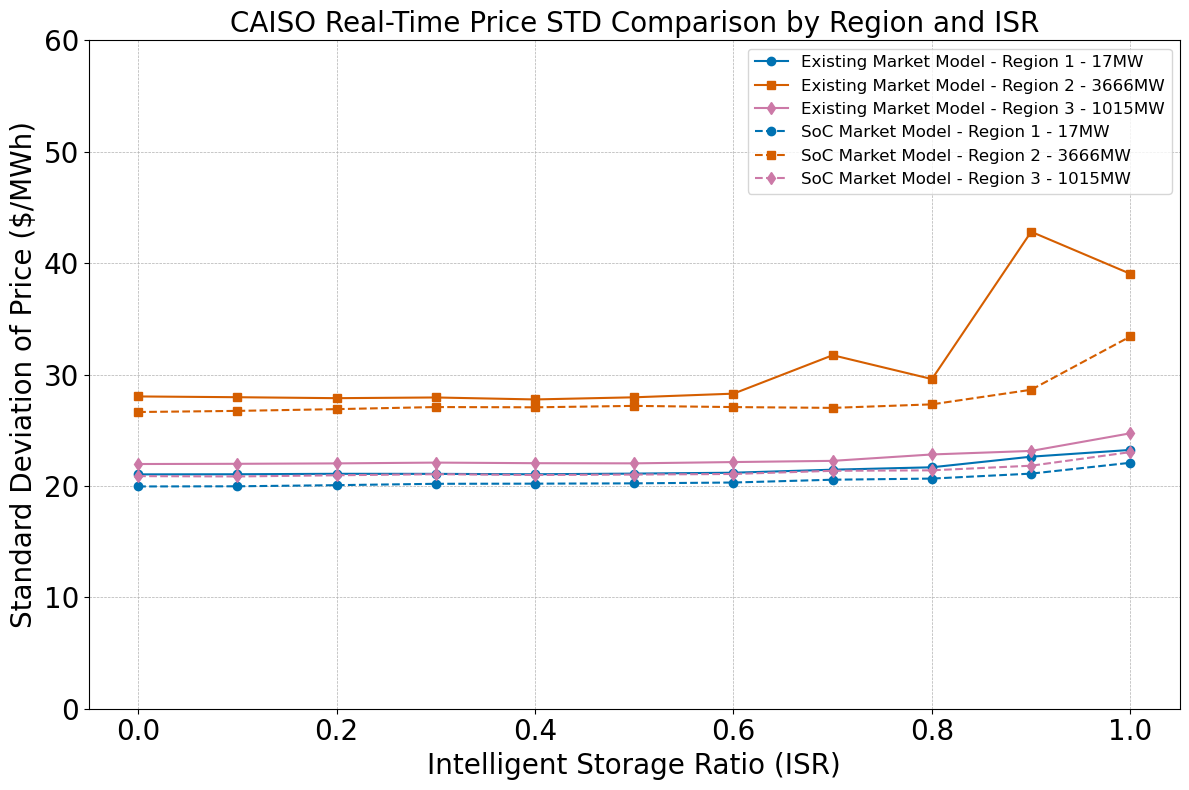

In [11]:
# Define case templates
case_templates = {
    'Existing Market Model': 'Strategic/LDES/10GW_ED1_Strategic_true_FORB_true_ratio1.0_Seg1_LDESRatio_{}-0.0-{}-0.0',
    'SoC Market Model': 'Strategic/LDES/10GW_ED1_Strategic_true_FORB_true_ratio1.0_Seg5_LDESRatio_{}-0.0-{}-0.0',
}
ratios = [round(i * 0.1, 1) for i in range(11)]
LDES24 = [2.23, 2.007, 1.784, 1.561, 1.338, 1.115, 0.892, 0.669, 0.446, 0.223, 0.0]

# Initialize dictionaries to hold DataFrames for both models
std_prices = {}

# Loop over the case templates
for model_name, case_template in case_templates.items():
    std_prices_dfs = []

    for (ratio,LDES) in zip(ratios,LDES24):
        case = case_template.format(ratio, LDES)
        try:
            # Read the CSV file for the current case
            price = pd.read_csv('output/' + case + '/EDprice.csv', header=None)
        except FileNotFoundError:
            print(f"File for case {case} not found.")
            continue

        # Calculate std and transpose
        pricestats = (price * 12).std().T

        # Append DataFrame slices
        std_prices_dfs.append(pricestats)

    # Convert lists of series to DataFrames
    std_prices[model_name] = pd.concat(std_prices_dfs, axis=1).reset_index(drop=True)
    std_prices[model_name].columns = ratios

# Plotting
plt.figure(figsize=(12, 8))

# Define colors, markers, and line styles
colors = ['#0072B2', '#D55E00', '#CC79A7']
labels = ['Region 1 - 17MW', 'Region 2 - 3666MW', 'Region 3 - 1015MW']
markers = ['o', 's', 'd']
line_styles = ['-', '--']

# Plot standard deviations
for (model_name, line_style) in zip(case_templates.keys(), line_styles):
    std_prices_df = std_prices[model_name].T

    for region, color, label, marker in zip(range(std_prices_df.shape[1]), colors, labels, markers):
        plt.plot(
            ratios, std_prices_df.iloc[:, region],
            label=f'{model_name} - {label}', color=color, linestyle=line_style, marker=marker, markersize=6
        )

plt.xlabel('Intelligent Storage Ratio (ISR)', fontsize=20)
plt.ylabel('Standard Deviation of Price ($/MWh)', fontsize=20)
plt.ylim([0, 60])
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('CAISO Real-Time Price STD Comparison by Region and ISR', fontsize=20)
plt.tight_layout()

# Save the plot to a file suitable for inclusion in your paper
# plt.savefig('/mnt/data/caiso_price_std_comparison.png', dpi=300)

# Show the plot
plt.show()

### Total System Cost & Avg SOC

In [12]:
case_template = 'Strategic/LDES/10GW_ED1_Strategic_true_FORB_true_ratio1.0_Seg1_LDESRatio_{}-0.0-{}-0.0'


ratios = [round(i * 0.1, 1) for i in range(11)]
LDES24 = [2.23, 2.007, 1.784, 1.561, 1.338, 1.115, 0.892, 0.669, 0.446, 0.223, 0.0]
# LDES100 = [2.23,1.796,1.115,0.599,0.0]
# ratios = [0.0]
# LDES100 = [2.23]
# ratios = [1.0]
# LDES100 = [0.0]
# Capacity = 39930.144
# Capacity = 59895.216
# Capacity = 79860.288

total_system_costs = []
# Loop over ratios from 0.0 to 1.0 (assuming increment by 0.1)
for (ratio,LDES) in zip(ratios,LDES24):
    case = case_template.format(ratio, LDES)
    Capacity = (ratio+1)*10000*4 + LDES*10000*24

    try:
        # Read the CSV file for the current case
        cost = pd.read_csv(f'output/{case}/EDcost.csv', header=None)
        SOC = pd.read_csv(f'output/{case}/EDSOCini.csv', header=None)
    except FileNotFoundError:
        print(f"File for case {case} not found.")
        # Optionally, append a NaN or some indicator of missing data
        total_system_costs.append({
                'System Cost': float('nan'),
                'Average SoC': float('nan')
        })
        continue
#     CapacityM = Capacity*ratio*3 + Capacity*(1-ratio)
    # Sum the total cost and normalize
    total_cost_normalized = cost.sum().values[0] / (10**10)
    if ratio == 0.0:
        avg_soc = SOC.iloc[:, -6:].sum().sum()/(Capacity*288*364)*100
#         avg_soc_bs = SOC.iloc[:, -6:].sum().sum()/(Capacity*288*364)*100
#         avg_soc_ai = float('nan')
    elif ratio == 1.0:
        avg_soc = SOC.iloc[:, -6:].sum().sum()/(Capacity*288*364)*100
#         avg_soc_bs = float('nan')
#         avg_soc_ai = SOC.iloc[:, -6:].sum().sum()/(Capacity*288*364)*100
    else:
        avg_soc = SOC.iloc[:, -12:].sum().sum()/(Capacity*288*364)*100
#         avg_soc_bs = SOC.iloc[:, -11::2].sum().sum()/(Capacity*288*364*(1-ratio))*100
#         avg_soc_ai = SOC.iloc[:, -12::2].sum().sum()/(Capacity*288*364*ratio)*100
    total_system_costs.append({
                'Total System Cost': total_cost_normalized,
                'Average System SoC': avg_soc,
#                 'Average BS-ES SoC': avg_soc_bs,
#                 'Average AI-ES SoC': avg_soc_ai,       
        })
# Convert the list to a DataFrame
total_system_costs_df = pd.DataFrame(total_system_costs, columns=['Total System Cost','Average System SoC'])
# total_system_costs_df = pd.DataFrame(total_system_costs, columns=['Total System Cost','Average BS-ES SoC','Average AI-ES SoC'])

# Adjust the index to represent ratios directly, if desired
# total_system_costs_df.index = [str(round(i * 0.1, 1)) for i in range(11)]
total_system_costs_df.index = ratios


total_system_costs_df

File for case Strategic/LDES/10GW_ED1_Strategic_true_FORB_true_ratio1.0_Seg1_LDESRatio_0.0-0.0-2.23-0.0 not found.
File for case Strategic/LDES/10GW_ED1_Strategic_true_FORB_true_ratio1.0_Seg1_LDESRatio_0.2-0.0-1.784-0.0 not found.
File for case Strategic/LDES/10GW_ED1_Strategic_true_FORB_true_ratio1.0_Seg1_LDESRatio_0.3-0.0-1.561-0.0 not found.
File for case Strategic/LDES/10GW_ED1_Strategic_true_FORB_true_ratio1.0_Seg1_LDESRatio_0.4-0.0-1.338-0.0 not found.
File for case Strategic/LDES/10GW_ED1_Strategic_true_FORB_true_ratio1.0_Seg1_LDESRatio_0.5-0.0-1.115-0.0 not found.
File for case Strategic/LDES/10GW_ED1_Strategic_true_FORB_true_ratio1.0_Seg1_LDESRatio_0.6-0.0-0.892-0.0 not found.
File for case Strategic/LDES/10GW_ED1_Strategic_true_FORB_true_ratio1.0_Seg1_LDESRatio_0.7-0.0-0.669-0.0 not found.
File for case Strategic/LDES/10GW_ED1_Strategic_true_FORB_true_ratio1.0_Seg1_LDESRatio_0.8-0.0-0.446-0.0 not found.
File for case Strategic/LDES/10GW_ED1_Strategic_true_FORB_true_ratio1.0_S

,Total System Cost,Average System SoC
0.0,NaN,NaN
0.1,1.352576,66.04124
0.2,NaN,NaN
0.3,NaN,NaN
0.4,NaN,NaN
0.5,NaN,NaN
0.6,NaN,NaN
0.7,NaN,NaN
0.8,NaN,NaN
0.9,NaN,NaN


In [13]:
case_template = 'Strategic/LDES/10GW_ED1_Strategic_true_FORB_true_ratio1.0_Seg5_LDESRatio_{}-0.0-{}-0.0'


ratios = [round(i * 0.1, 1) for i in range(11)]
LDES24 = [2.23, 2.007, 1.784, 1.561, 1.338, 1.115, 0.892, 0.669, 0.446, 0.223, 0.0]
LDES100 = [2.23,1.796,1.115,0.599,0.0]
# ratios = [0.0]
# LDES100 = [2.23]
# ratios = [1.0]
# LDES100 = [0.0]
# Capacity = 39930.144
# Capacity = 59895.216
# Capacity = 79860.288

total_system_costs = []
# Loop over ratios from 0.0 to 1.0 (assuming increment by 0.1)
for (ratio,LDES) in zip(ratios,LDES24):
    case = case_template.format(ratio, LDES)
    Capacity = (ratio+1)*10000*4 + LDES*10000*24

    try:
        # Read the CSV file for the current case
        cost = pd.read_csv(f'output/{case}/EDcost.csv', header=None)
        SOC = pd.read_csv(f'output/{case}/EDSOCini.csv', header=None)
    except FileNotFoundError:
        print(f"File for case {case} not found.")
        # Optionally, append a NaN or some indicator of missing data
        total_system_costs.append({
                'System Cost': float('nan'),
                'Average SoC': float('nan')
        })
        continue
#     CapacityM = Capacity*ratio*3 + Capacity*(1-ratio)
    # Sum the total cost and normalize
    total_cost_normalized = cost.sum().values[0] / (10**10)
    if ratio == 0.0:
        avg_soc = SOC.iloc[:, -6:].sum().sum()/(Capacity*288*364)*100
#         avg_soc_bs = SOC.iloc[:, -6:].sum().sum()/(Capacity*288*364)*100
#         avg_soc_ai = float('nan')
    elif ratio == 1.0:
        avg_soc = SOC.iloc[:, -6:].sum().sum()/(Capacity*288*364)*100
#         avg_soc_bs = float('nan')
#         avg_soc_ai = SOC.iloc[:, -6:].sum().sum()/(Capacity*288*364)*100
    else:
        avg_soc = SOC.iloc[:, -12:].sum().sum()/(Capacity*288*364)*100
#         avg_soc_bs = SOC.iloc[:, -11::2].sum().sum()/(Capacity*288*364*(1-ratio))*100
#         avg_soc_ai = SOC.iloc[:, -12::2].sum().sum()/(Capacity*288*364*ratio)*100
    total_system_costs.append({
                'Total System Cost': total_cost_normalized,
                'Average System SoC': avg_soc,
#                 'Average BS-ES SoC': avg_soc_bs,
#                 'Average AI-ES SoC': avg_soc_ai,       
        })
# Convert the list to a DataFrame
total_system_costs_df2 = pd.DataFrame(total_system_costs, columns=['Total System Cost','Average System SoC'])
# total_system_costs_df = pd.DataFrame(total_system_costs, columns=['Total System Cost','Average BS-ES SoC','Average AI-ES SoC'])

# Adjust the index to represent ratios directly, if desired
# total_system_costs_df.index = [str(round(i * 0.1, 1)) for i in range(11)]
total_system_costs_df2.index = ratios


total_system_costs_df2

File for case Strategic/LDES/10GW_ED1_Strategic_true_FORB_true_ratio1.0_Seg5_LDESRatio_0.1-0.0-2.007-0.0 not found.
File for case Strategic/LDES/10GW_ED1_Strategic_true_FORB_true_ratio1.0_Seg5_LDESRatio_0.2-0.0-1.784-0.0 not found.
File for case Strategic/LDES/10GW_ED1_Strategic_true_FORB_true_ratio1.0_Seg5_LDESRatio_0.3-0.0-1.561-0.0 not found.
File for case Strategic/LDES/10GW_ED1_Strategic_true_FORB_true_ratio1.0_Seg5_LDESRatio_0.4-0.0-1.338-0.0 not found.
File for case Strategic/LDES/10GW_ED1_Strategic_true_FORB_true_ratio1.0_Seg5_LDESRatio_0.5-0.0-1.115-0.0 not found.
File for case Strategic/LDES/10GW_ED1_Strategic_true_FORB_true_ratio1.0_Seg5_LDESRatio_0.6-0.0-0.892-0.0 not found.
File for case Strategic/LDES/10GW_ED1_Strategic_true_FORB_true_ratio1.0_Seg5_LDESRatio_0.7-0.0-0.669-0.0 not found.
File for case Strategic/LDES/10GW_ED1_Strategic_true_FORB_true_ratio1.0_Seg5_LDESRatio_0.8-0.0-0.446-0.0 not found.
File for case Strategic/LDES/10GW_ED1_Strategic_true_FORB_true_ratio1.0_

,Total System Cost,Average System SoC
0.0,1.348194,62.296185
0.1,NaN,NaN
0.2,NaN,NaN
0.3,NaN,NaN
0.4,NaN,NaN
0.5,NaN,NaN
0.6,NaN,NaN
0.7,NaN,NaN
0.8,NaN,NaN
0.9,NaN,NaN


In [ ]:
# Define ratios (x-axis values)
ratios = [round(i * 0.1, 1) for i in range(11)]

# Assuming total_system_costs_df and total_system_costs_df2 are already defined
# Calculate percentage reduction compared to 0.0 ISR
initial_cost1 = total_system_costs_df['Total System Cost'].iloc[0]
initial_cost2 = total_system_costs_df2['Total System Cost'].iloc[0]

percentage_reduction1 = (total_system_costs_df['Total System Cost'] - initial_cost1) / initial_cost1 * 100
percentage_reduction2 = (total_system_costs_df2['Total System Cost'] - initial_cost2) / initial_cost2 * 100

# Define bar width and bar positions
bar_width = 0.4
bar_positions1 = np.arange(len(ratios))
bar_positions2 = bar_positions1 + bar_width

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot total system costs
color1 = '#0072B2'
color2 = '#009E73'
ax1.set_xlabel('12hr Battery Ratio', fontsize=20)
ax1.set_ylabel('Total System Cost (Billion $)', fontsize=20)
bar1 = ax1.bar(bar_positions1, total_system_costs_df['Total System Cost'], width=bar_width, color=color1, alpha=0.6, label='Total System Cost - SoC-Independent')
bar2 = ax1.bar(bar_positions2, total_system_costs_df2['Total System Cost'], width=bar_width, color=color2, alpha=0.6, label='Total System Cost - SoC-Dependent')
ax1.tick_params(axis='y', labelsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.set_ylim([1.34, 1.38])

# Instantiate a second y-axis for percentage reduction
ax2 = ax1.twinx()
ax2.set_ylabel('Average System BESS SoC (%)', fontsize=20)

# Plot percentage reductions
line1, = ax2.plot(bar_positions1 + bar_width / 2, total_system_costs_df['Average System SoC'], '-o', color=color1, label='Average System SoC - SoC-Independent')
line2, = ax2.plot(bar_positions1 + bar_width / 2, total_system_costs_df2['Average System SoC'], '-o', color=color2, label='Average System SoC - SoC-Dependent')
# line1, = ax2.plot(bar_positions1 + bar_width / 2, total_system_costs_df['Average BS-ES SoC'], '-o', color=color1, label='Average BS-ES SoC - SoC-Independent')
# line2, = ax2.plot(bar_positions1 + bar_width / 2, total_system_costs_df2['Average BS-ES SoC'], '-o', color=color2, label='Average BS-ES SoC - SoC-Dependent')
# line3, = ax2.plot(bar_positions1 + bar_width / 2, total_system_costs_df['Average AI-ES SoC'], '-s', color=color1, label='Average AI-ES SoC - SoC-Independent')
# line4, = ax2.plot(bar_positions1 + bar_width / 2, total_system_costs_df2['Average AI-ES SoC'], '-s', color=color2, label='Average AI-ES SoC - SoC-Dependent')
ax2.tick_params(axis='y', labelsize=20)
ax2.set_ylim([0,100])

# Set x-axis ticks to be in the middle of the grouped bars
ax1.set_xticks(bar_positions1 + bar_width / 2)
ax1.set_xticklabels(ratios, fontsize=20)

# Combine legends from both axes
lines = [line1, line2]
# lines = [line1, line2, line3, line4]
bars = [bar1, bar2]
ax1.legend(bars + lines, [bar.get_label() for bar in bars] + [line.get_label() for line in lines], loc='upper right', fontsize=20)

fig.tight_layout()
plt.title('Total System Cost and Average BESS SoC Across WECC vs 12hr Battery Ratio', fontsize=20)
plt.show()

### Loss of load

In [14]:
LL = pd.DataFrame(index=np.arange(0.0, 1.1, 0.1))

In [15]:
case_template = 'Strategic/LDES/10GW_ED1_Strategic_true_FORB_true_ratio1.0_Seg1_LDESRatio_{}-0.0-{}-0.0'


ratios = [round(i * 0.1, 1) for i in range(11)]
LDES24 = [2.23, 2.007, 1.784, 1.561, 1.338, 1.115, 0.892, 0.669, 0.446, 0.223, 0.0]
LDES100 = [2.23,1.796,1.115,0.599,0.0]

case_name = 'SOC-Independent'

In [19]:
case_template = 'Strategic/LDES/10GW_ED1_Strategic_true_FORB_true_ratio1.0_Seg5_LDESRatio_{}-0.0-{}-0.0'


ratios = [round(i * 0.1, 1) for i in range(11)]
LDES24 = [2.23, 2.007, 1.784, 1.561, 1.338, 1.115, 0.892, 0.669, 0.446, 0.223, 0.0]
LDES100 = [2.23,1.796,1.115,0.599,0.0]

case_name = 'SOC-Dependent'

In [20]:
total_system_ll = []
# Loop over ratios from 0.0 to 1.0 (assuming increment by 0.1)
for (ratio,LDES) in zip(ratios,LDES24):
    case = case_template.format(ratio, LDES)
    try:
        # Read the CSV file for the current case
        ll = pd.read_csv(f'output/{case}/EDSlack.csv', header=None)
    except FileNotFoundError:
        print(f"File for case {case} not found.")
        # Optionally, append a NaN or some indicator of missing data
        total_system_ll.append(float('nan'))
        continue

    # Sum the total ll
    total_ll = ll.sum().sum()/12
    total_system_ll.append(total_ll)
total_system_ll  

[416.6666666666667,
 350.0,
 384.52396504922854,
 353.26196202024835,
 354.40158318501676,
 350.0,
 198.76399106071915,
 148.56649197999454,
 166.1458996047705,
 217.45230327454885,
 1566.7345032064488]

In [21]:
LL[case_name] = total_system_ll
LL

,SOC-Independent,SOC-Dependent
0.0,825.219109,416.666667
0.1,694.368788,350.000000
0.2,642.083868,384.523965
0.3,694.932729,353.261962
0.4,650.377709,354.401583
0.5,731.689759,350.000000
0.6,897.430202,198.763991
0.7,2146.763174,148.566492
0.8,1000.176992,166.145900
0.9,5320.068449,217.452303


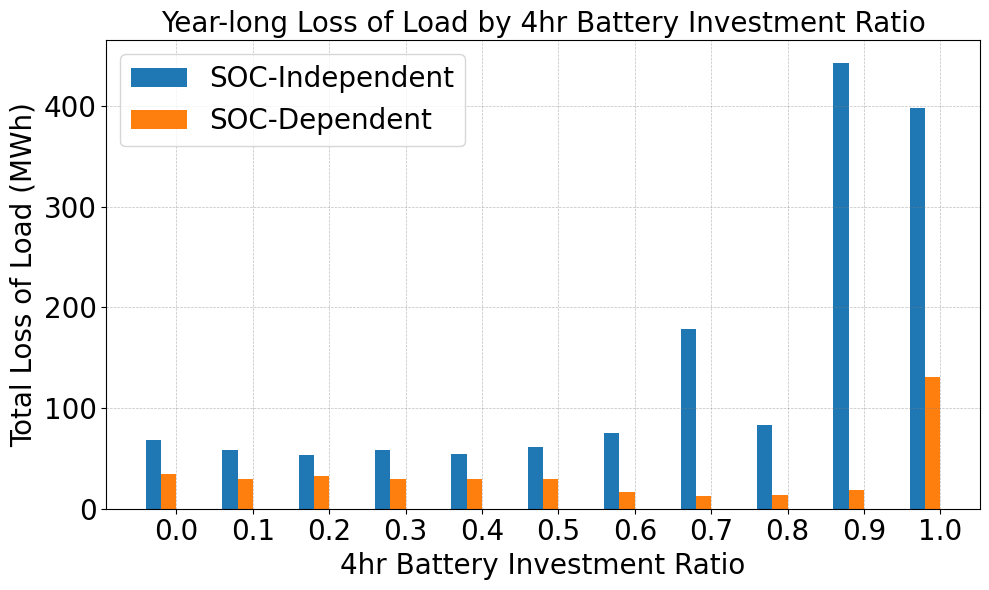

In [22]:
case_names = LL.columns
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(LL.index))  # the label locations
width = 0.2  # the width of the bars
fontsize = 20
# Define colors for related cases
colors = ['#1f77b4', '#ff7f0e', '#aec7e8', '#ffbb78']  # Dark and light shades of blue and orange

for i, name in enumerate(case_names):
    ax.bar(x + i*width - width*1.5, LL[name]/12, width, label=name, color=colors[i])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('4hr Battery Investment Ratio', fontsize=fontsize)
ax.set_ylabel('Total Loss of Load (MWh)', fontsize=fontsize)
ax.set_title('Year-long Loss of Load by 4hr Battery Investment Ratio', fontsize=fontsize)
ax.set_xticks(x)
ax.set_xticklabels([f"{label:.1f}" for label in LL.index], fontsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize)
ax.legend(fontsize=fontsize, title_fontsize=fontsize)

# Beautify the plot
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.tight_layout()

plt.show()

## Storage Profit & Utilization (12hr Battery 0.1-0.5)

In [37]:
ESD[42].max()

10291.895231110171

In [63]:
df = pd.DataFrame({'A': ESD[42], 'B': ESC[42]})
filtered_df = df[(df['A'] != 0) & (df['B'] != 0)]
filtered_df[0:60]

,A,B
13056,153.442113,272.785978
13057,291.054695,517.430570
13058,459.316488,816.562645
13059,651.579507,1158.363568
13060,836.445258,1487.013792
13061,1010.847516,1797.062250
13062,1164.665274,2070.516043
13063,1304.123713,2318.442156
13064,1434.750656,2550.667833
13065,1565.103024,2782.405377


In [ ]:
37.08135338/0.75

In [ ]:
-41.03338623/0.75

In [55]:
indices = price[i][price[i] < 0].index
indices

Index([10824, 11266, 11267, 11268, 11269, 11270, 11271, 11272, 11273, 11274,
       ...
       51350, 51351, 51352, 51353, 51354, 51355, 51356, 51357, 51358, 51359],
      dtype='int64', length=758)

In [68]:
71.01294963*153.442113 -34.31978416*272.785978

1534.4211547552586

In [69]:
-12.857143*(153.442113-272.785978)

1534.421138477695

In [65]:
price[i][13056:13069]*12

13056   -12.857143
13057   -12.857143
13058   -12.857143
13059   -12.857143
13060   -12.857143
13061   -12.857143
13062   -12.857143
13063   -12.857143
13064   -12.857143
13065   -12.857143
13066   -12.857143
13067   -12.857143
13068     0.000000
Name: 1, dtype: float64

In [ ]:
71.01294963*153.442113 - 

In [53]:
ESD[ESID-1].max()

36     7477.671000
42    10291.895231
dtype: float64

In [76]:
case_template = 'Strategic/LDES/10GW_ED1_Strategic_true_FORB_true_ratio1.0_Seg1_LDESRatio_{}-0.0-{}-0.0'


ratios = [round(i * 0.1, 1) for i in range(11)]
LDES24 = [2.23, 2.007, 1.784, 1.561, 1.338, 1.115, 0.892, 0.669, 0.446, 0.223, 0.0]
LDES100 = [2.23,1.796,1.115,0.599,0.0]
# ratios = [0.0]
# LDES100 = [2.23]
region = 2

# Initialize an empty list to store results
results = []

# Initialize an empty list to store results
results = []

# Loop over ratios from 0.0 to 1.0 (assuming increment by 0.1)
for (ratio,LDES) in zip(ratios,LDES24):
    case = case_template.format(ratio, LDES)
    try:
        # Try to read the CSV file for the current case
        ESD = pd.read_csv('output/'+case+'/EDESD.csv',header=None)
        ESC = pd.read_csv('output/'+case+'/EDESC.csv',header=None)
        price = pd.read_csv('output/'+case+'/EDprice.csv',header=None)
        ESindex = pd.read_csv('output/'+case+'/Strategic/storage_to_index_map.csv')
        ES = pd.read_csv('output/'+case+'/Strategic/ADDED_LDES.csv')
    except FileNotFoundError:
        print(f"File for case {case} not found.")
        continue
    if (ratio <= 0.9) & (ratio >=0.1):
        ESID = ESindex[ESindex['Region']==region]['StorageID']
        i = region -1
        BESSRevenue = sum((ESD[ESID-1]-ESC[ESID-1]).iloc[:, 0]*price[i])/1000 + sum((ESD[ESID-1]-ESC[ESID-1]).iloc[:, 1]*price[i])/1000
        LDESRevenue = sum((ESD[ESID-1]-ESC[ESID-1]).iloc[:, 2]*price[i])/1000
        BESSProfit = BESSRevenue - sum(Ts*c*ESD[ESID-1].iloc[:, 0])/1000 - sum(Ts*c*ESD[ESID-1].iloc[:, 1])/1000
        LDESProfit = LDESRevenue - sum(Ts*10*ESD[ESID-1].iloc[:, 2])/1000
        BESSUnitProfit = BESSProfit/(ES['EPD'][i+35]+ES['EPD'][2*i+41])
        LDESUnitProfit = LDESProfit/ES['EPD'][2*i+42]
        BESSCycle = sum(ESD[ESID-1].iloc[:, 0]+ESD[ESID-1].iloc[:, 1])/eta*Ts/(ES['ESOC'][i+35]+ES['EPD'][2*i+41])
        LDESCycle = sum(ESD[ESID-1].iloc[:, 2])/0.75*Ts/ES['ESOC'][2*i+42]
    elif ratio == 1.0:
        ESID = ESindex[ESindex['Region']==region]['StorageID']
        i = region -1
        BESSRevenue = sum((ESD[ESID-1]-ESC[ESID-1]).iloc[:, 0]*price[i])/1000 + sum((ESD[ESID-1]-ESC[ESID-1]).iloc[:, 1]*price[i])/1000
        LDESRevenue = 0.0
        BESSProfit = BESSRevenue - sum(Ts*c*ESD[ESID-1].iloc[:, 0])/1000 - sum(Ts*c*ESD[ESID-1].iloc[:, 1])/1000
        LDESProfit = 0.0
        BESSUnitProfit = BESSProfit/(ES['EPD'][i+35]+ES['EPD'][i+41])
        LDESUnitProfit = 0.0
        BESSCycle = sum(ESD[ESID-1].iloc[:, 0]+ESD[ESID-1].iloc[:, 1])/eta*Ts/(ES['ESOC'][i+35]+ES['EPD'][i+41])
        LDESCycle = 0.0
    elif ratio == 0.0:
        ESID = ESindex[ESindex['Region']==region]['StorageID']
        i = region -1
        BESSRevenue = sum((ESD[ESID-1]-ESC[ESID-1]).iloc[:, 0]*price[i])/1000
        LDESRevenue = sum((ESD[ESID-1]-ESC[ESID-1]).iloc[:, 1]*price[i])/1000
        BESSProfit = BESSRevenue - sum(Ts*c*ESD[ESID-1].iloc[:, 0])/1000
        LDESProfit = LDESRevenue - sum(Ts*10*ESD[ESID-1].iloc[:, 1])/1000
        BESSUnitProfit = BESSProfit/ES['EPD'][i+35]
        LDESUnitProfit = LDESProfit/ES['EPD'][i+42]
        BESSCycle = sum(ESD[ESID-1].iloc[:, 0])/eta*Ts/(ES['ESOC'][i+35])
        LDESCycle = sum(ESD[ESID-1].iloc[:, 1])/0.75*Ts/ES['ESOC'][i+42]
        

    # Append results to list
    results.append({
        '4hr Ratio': ratio,
        '4hrRevenue': BESSRevenue,
        '100hrRevenue': LDESRevenue,
        '4hrProfit': BESSProfit,
        '100hrProfit': LDESProfit,
        '4hrUnitProfit': BESSUnitProfit,
        '100hrUnitProfit': LDESUnitProfit,
        '4hrCycle': BESSCycle,
        '100hrCycle': LDESCycle
    })

# Convert list of dictionaries to DataFrame
results_df = pd.DataFrame(results)
results_df


,4hr Ratio,4hrRevenue,100hrRevenue,4hrProfit,100hrProfit,4hrUnitProfit,100hrUnitProfit,4hrCycle,100hrCycle
0,0.0,-16156.537564,12237.409283,-82465.873044,-7406.248507,-11.028283,-1.603579,123.161743,23.628809
1,0.1,-16809.194912,10162.132125,-84943.851104,-9144.262632,-10.326970,-0.609305,123.465424,7.146855
2,0.2,-15554.695818,9498.234738,-85683.366964,-9372.344846,-9.548803,-0.702566,124.053054,7.858715
3,0.3,-17158.111081,10429.875515,-87212.612797,-8072.242555,-8.971594,-0.691552,121.039950,8.806020
4,0.4,-20640.604130,5247.380454,-93508.887584,-13049.197788,-8.932201,-1.304252,123.040193,10.159560
5,0.5,-19335.817454,6130.067376,-91844.179593,-11834.954324,-8.188305,-1.419467,119.711734,11.970548
6,0.6,-24276.959619,6648.913443,-97438.590129,-11198.816798,-8.144129,-1.678962,118.164409,14.865492
7,0.7,-33960.708194,10503.158835,-108138.836625,-6573.044918,-8.506804,-1.313936,117.257102,18.963843
8,0.8,-32143.616614,20950.116025,-106530.541066,5904.295636,-7.914715,1.770382,115.137424,25.063525
9,0.9,-53595.570727,24574.384103,-137801.961831,14041.652393,-9.699190,8.420677,127.676249,35.091126


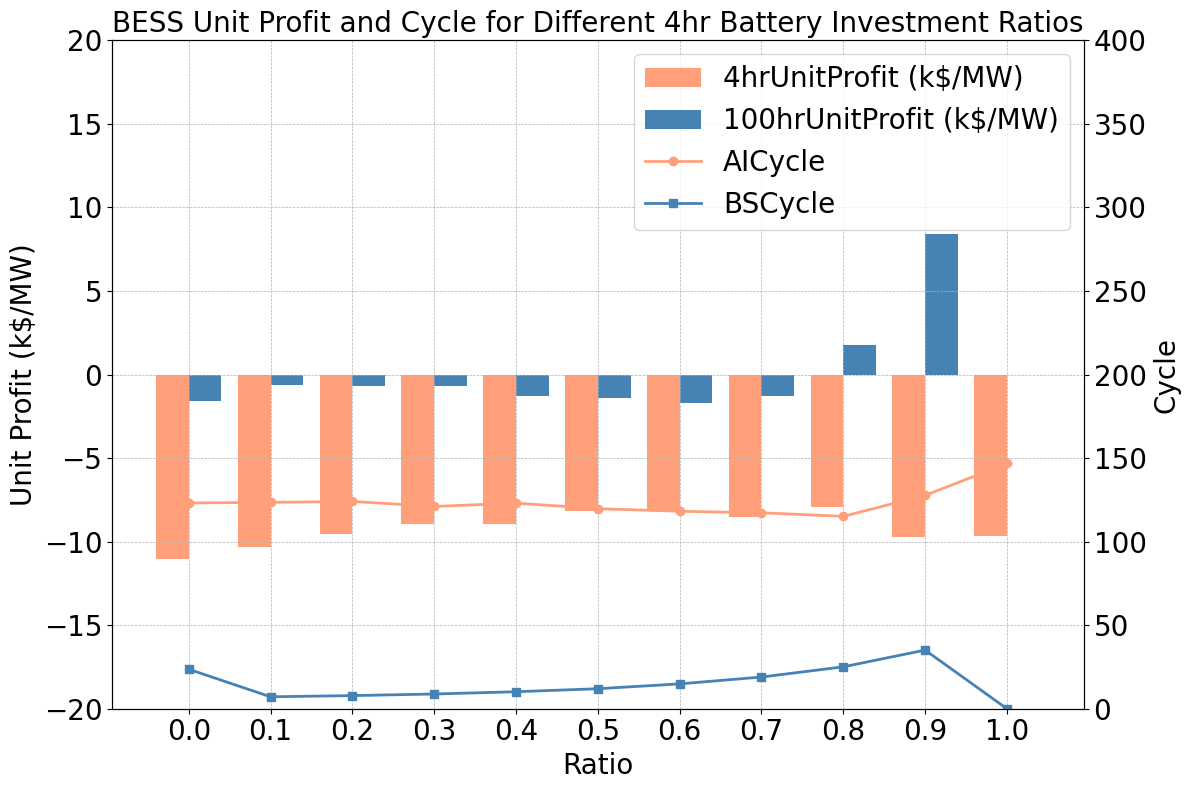

In [78]:
# Define a color palette
colors = ['#FFA07A', '#4682B4', '#FFA07A', '#4682B4']

# Plotting the results
fig, ax1 = plt.subplots(figsize=(12, 8))

# Set bar width
bar_width = 0.4
index = range(len(results_df))

# Plotting bars for AIUnitProfit and BSUnitProfit
bar1 = ax1.bar([i - bar_width/2 for i in index], results_df['4hrUnitProfit'], bar_width, label='4hrUnitProfit (k$/MW)', color=colors[0])
bar2 = ax1.bar([i + bar_width/2 for i in index], results_df['100hrUnitProfit'], bar_width, label='100hrUnitProfit (k$/MW)', color=colors[1])

# Adding labels and title for the primary y-axis
ax1.set_xlabel('Ratio', fontsize=20)
ax1.set_ylabel('Unit Profit (k$/MW)', fontsize=20)
ax1.set_xticks(index)
ax1.set_xticklabels(results_df['4hr Ratio'], fontsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.set_ylim([-20, 20])


# Adding a secondary y-axis for AICycle and BSCycle
ax2 = ax1.twinx()
ax2.plot(index, results_df['4hrCycle'], label='4hrCycle', color=colors[2], linestyle='-', marker='o', linewidth=2)
ax2.plot(index, results_df['100hrCycle'], label='100hrCycle', color=colors[3], linestyle='-', marker='s', linewidth=2)
ax2.set_ylabel('Cycle', fontsize=20)
ax2.set_ylim(0, 400)
ax2.tick_params(axis='y', labelsize=20)

# Adding grid lines for better readability
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Combining legends
bars_labels = [bar1, bar2]
lines_labels = [plt.Line2D([0], [0], color=colors[2], linestyle='-', marker='o', linewidth=2, label='AICycle'),
                plt.Line2D([0], [0], color=colors[3], linestyle='-', marker='s', linewidth=2, label='BSCycle')]

combined_legend = bars_labels + lines_labels
ax1.legend(handles=combined_legend, loc='upper right', fontsize=20)

# Adding title
plt.title('BESS Unit Profit and Cycle for Different 4hr Battery Investment Ratios', fontsize=20)

# Improving layout
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
case_template = 'Strategic/LDES/ED1_Strategic_true_FORB_true_ratio1.0_Seg1_BAW0_BSESCbid0.5_LDESRatio_{}-{}_LDESDur_4-12'
ratios = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
region = 2

# Initialize an empty list to store results
results = []

# Initialize an empty list to store results
results = []

# Loop over ratios from 0.0 to 1.0 (assuming increment by 0.1)
for ratio in ratios:
    if (ratio <= 0.9) & (ratio >=0.1):
        case = case_template.format(round(1-ratio,1), ratio)
        try:
            # Try to read the CSV file for the current case
            ESD = pd.read_csv('output/'+case+'/EDESD.csv',header=None)
            ESC = pd.read_csv('output/'+case+'/EDESC.csv',header=None)
            price = pd.read_csv('output/'+case+'/EDprice.csv',header=None)
            ESindex = pd.read_csv('output/'+case+'/Strategic/storage_to_index_map.csv')
            ES = pd.read_csv('output/'+case+'/Strategic/UPDATED_LDES.csv')
        except FileNotFoundError:
            print(f"File for case {case} not found.")
            continue

        ESID = ESindex[ESindex['Region']==region]['StorageID']
        i = region -1
        AIRevenue = sum((ESD[ESID-1]-ESC[ESID-1]).iloc[:, 0]*price[i])/1000
        BSRevenue = sum((ESD[ESID]-ESC[ESID]).iloc[:, 0]*price[i])/1000
        AIProfit = AIRevenue - sum(Ts*c*ESD[ESID-1].iloc[:, 0])/1000
        BSProfit = BSRevenue - sum(Ts*c*ESD[ESID].iloc[:, 0])/1000
        AIUnitProfit = AIProfit/ES['EPD'][35+2*i+35]
        BSUnitProfit = BSProfit/ES['EPD'][2*i+36]
        AICycle = sum(ESD[ESID-1].iloc[:, 0])/eta*Ts/ES['ESOC'][2*i]
        BSCycle = sum(ESD[ESID].iloc[:, 0])/eta*Ts/ES['ESOC'][2*i+1]
        
        # Append results to list
        results.append({
            '12 hr Ratio': ratio,
            '4hrRevenue': AIRevenue,
            '12hrRevenue': BSRevenue,
            '4hrProfit': AIProfit,
            '12hrProfit': BSProfit,
            '4hrUnitProfit': AIUnitProfit,
            '12hrUnitProfit': BSUnitProfit,
            '4hrCycle': AICycle,
            '12hrCycle': BSCycle
        })

# Convert list of dictionaries to DataFrame
results_df = pd.DataFrame(results)
results_df


In [ ]:
# case = 'Strategic/Exp1.2/2022/ED1_Strategic_true_FORB_true_ratio0.0_Seg1_BAW0_1.0-2.0-2.0-2.0-2.0'
# case = 'Strategic/Quad/2022/ED1_Strategic_true_FORB_true_ratio0.0_Seg1_BAW0_BSESCbid0.5'
case = 'Strategic/LDES/ED1_Strategic_true_FORB_true_ratio1.0_Seg1_BAW0_BSESCbid0.5_LDESRatio_1.0-0.0_LDESDur_4-12'

ESD = pd.read_csv('output/'+case+'/EDESD.csv',header=None)
ESC = pd.read_csv('output/'+case+'/EDESC.csv',header=None)
price = pd.read_csv('output/'+case+'/EDprice.csv',header=None)
ESindex = pd.read_csv('output/'+case+'/Strategic/storage_to_index_map.csv')
ES = pd.read_csv('2032 ADS PCM V2.4.1 Public Data/Processed Data/2022/Storage_C_4hr_5GW_Strategic_Agg.csv')

In [ ]:
ESC[ESID-1].max()

In [ ]:
i = 1
region = i+1
ESID = region+35
AIRevenue = sum((ESD[ESID-1]-ESC[ESID-1])*price[i])/1000
# BSRevenue = sum((ESD[ESID]-ESC[ESID]).iloc[:, 0]*price[i])/1000
AIProfit = AIRevenue - sum(Ts*c*ESD[ESID-1])/1000
# BSProfit = BSRevenue - sum(Ts*c*ESD[ESID].iloc[:, 0])/1000
AIUnitProfit = AIProfit/ES['MaxCap(MWh)'][ESID-1]
# BSUnitProfit = BSProfit/ES['ESOC'][2*i+1]
AICycle = sum(ESD[ESID-1])/eta*Ts/ES['MaxCap(MWh)'][ESID-1]
# BSCycle = sum(ESD[ESID].iloc[:, 0])/eta*Ts/ES['ESOC'][2*i+1]
# print(AIRevenue,BSRevenue, AIProfit, BSProfit, AIUnitProfit, BSUnitProfit, AICycle, BSCycle)
print(AIRevenue, AIProfit, AIUnitProfit, AICycle)